In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 1s 11us/step


In [4]:
xtest.shape

(102, 13)

In [5]:
ytest.shape

(102,)

Build a model

In [6]:
norm = tf.keras.layers.Normalization()
norm.adapt(xtrain)

In [7]:
model = tf.keras.models.Sequential()
model.add(norm)
model.add(tf.keras.layers.Dense(32,input_shape=(13,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,564
Trainable params: 1,537
Non-trainable params: 27
_________________________________________________________________


Compile the model

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'mean_absolute_error',
)

train model

In [9]:
es = tf.keras.callbacks.EarlyStopping(patience=5)

In [10]:
history = model.fit(
    x = xtrain,
    y = ytrain,
    epochs = 100,
    validation_data = [xtest, ytest],
    callbacks=[es]
)

Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 22.1688 - val_loss: 22.5810
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 21.6423 - val_loss: 22.0031
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 21.0030 - val_loss: 21.2414
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 20.1075 - val_loss: 20.1692
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 18.8508 - val_loss: 18.6370
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 17.0457 - val_loss: 16.4675
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 14.5906 - val_loss: 13.6892
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6004 - val_loss: 10.8648
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 8.6896 - val_loss: 8.5059
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 7.0435 - val_loss: 

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(history.history)
df['epoch'] = history.epoch
df.head()

,loss,val_loss,epoch
0,22.168808,22.580954,0
1,21.642345,22.003067,1
2,21.002960,21.241405,2
3,20.107540,20.169155,3
4,18.850760,18.636980,4


In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_loss(df):
    plt.plot(df['loss'], label='training loss')
    plt.plot(df['val_loss'], label='validation loss')
    plt.ylim([0,10])
    plt.xlabel('epoch')
    plt.ylabel('Error (MAE)')
    plt.legend()
    plt.grid(True)

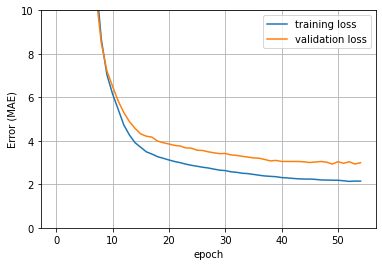

In [15]:
plot_loss(df)
plt.show()

Save model

In [16]:
model.save("bhpricing")

INFO:tensorflow:Assets written to: bhpricing\assets


Predicition

In [17]:
ypred = model.predict(xtest)